In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/combined_data/cleaned_data_1.csv')

In [3]:
df.head()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,239.695455
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,264.064286
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333


In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Decision Tree Regressor


In [6]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(criterion='mse')
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [7]:
f'Coefficient of  R^2 on train set {tree.score(X_train, y_train)}'
# must be close to 1, 1 is perfect fit

'Coefficient of  R^2 on train set 1.0'

In [10]:
f'Coefficient of determination R^2 on test set {tree.score(X_test, y_test)}'

'Coefficient of determination R^2 on test set -0.07465519943972687'

- Overfit Model

In [11]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(tree, X, y, cv = 3)

In [12]:
score.mean()

-0.24726670473927936

# tree Visualization

In [14]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [19]:
data = export_graphviz(tree,out_file=None,feature_names=X.columns,class_names=y.index)

graph = pydotplus.graph_from_dot_data(data)

Image(graph.create_png())

In [20]:
graph.write_png("tree_vis.png")

True

In [21]:
pred = tree.predict(X_test)

In [22]:
pred 

array([ 14.5       , 245.66666667,  54.76923077,  50.70833333,
        22.83333333, 278.33333333,  83.21052632, 231.125     ,
        20.75      , 332.70833333, 127.86666667, 185.34782609,
       185.95833333, 101.95833333,  69.95833333, 121.33333333,
       149.58333333, 105.33333333, 239.13043478,  77.        ,
        78.93333333,  69.375     ,  90.33333333, 365.29166667,
       174.9375    ,  25.45833333, 288.41666667, 286.375     ,
         2.55555556,  97.71428571, 121.33333333, 110.16666667,
        92.91666667,  35.20833333,  97.29166667, 127.70833333,
       110.875     ,  14.5       , 204.54545455,  26.875     ,
       182.1875    , 276.4       ,  78.93333333,  41.45833333,
       282.16666667,  47.04166667,  80.56521739,  90.70833333,
       108.        , 422.08695652,  82.875     , 268.86956522,
        69.95833333, 136.70833333,  81.20833333, 422.08695652,
        21.38461538,  91.5       , 109.45833333, 188.04166667,
        82.73913043,  69.375     ,  90.70833333, 223.20

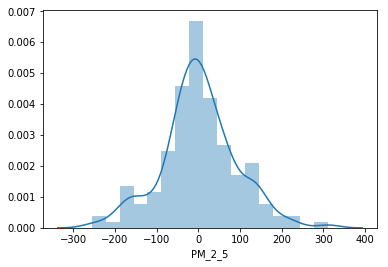

In [23]:
sns.distplot(y_test - pred)

In [25]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 66.68621683078263
MSE: 8104.7208948346215
RMSE: 90.02622337316289


# Hyperparameter Tunning

In [26]:
from sklearn.model_selection import GridSearchCV

params = {
    'splitter': ['best', 'random'],
    'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
    'min_samples_leaf': list(range(1,6)),
    'min_weight_fraction_leaf': [i/10 for i in range(1, 5)],
    'max_features': ['auto', 'log2', 'sqrt', None],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70]
}

In [27]:

random_search=GridSearchCV(tree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [28]:
random_search.fit(X,y)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 2352 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 6512 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 12336 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 19824 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 28976 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 39792 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 52272 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 66416 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 82224 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 99696 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 102400 out of 102400 | elapsed:  3.0min finished
/home/ind/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'splitter': ['best', 'random'], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_samples_leaf': [1, 2, 3, 4, 5], 'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4], 'max_features': ['auto', 'log2', 'sqrt', None], 'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=3)

In [29]:
print(random_search.best_params_)
print(random_search.best_score_)

{'max_depth': 4, 'max_features': 'log2', 'max_leaf_nodes': 30, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
-4062.8898729689104


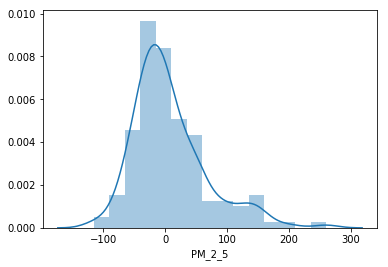

In [31]:
pred_1 = random_search.predict(X_test)
sns.distplot(y_test-pred_1)

In [32]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred_1)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred_1)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred_1))}")

Mean Abs Error: 43.71622120785417
Mean Sq Error: 3695.4211091297934
Root Mean Error: 60.789975399976875


In [33]:
random_search.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features='log2',
           max_leaf_nodes=30, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.1,
           presort=False, random_state=None, splitter='best')

In [34]:
import pickle
pickle.dump(random_search,open('D-Tree.pkl','wb'))